> **Importing all libraries**

In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

> **Importing complete data**

In [2]:
raw_data = pd.read_csv("../input/logical-rhythm-2k21-cars24/train.csv")
raw_data

,car ID,model_year,maker,model_name,city,distance_covered (km),fuel_type,transmission_type,pre_owner,price
0,0,2016,Hyundai,Grand i10,Chennai,68788,Petrol,Manual,2nd Owner,453599
1,1,2010,Hyundai,i20,Hyderabad,68124,Petrol,Manual,2nd Owner,330999
2,2,2017,Maruti,Baleno,Hyderabad,59880,Petrol,Manual,1st Owner,674599
3,3,2009,Maruti,Alto,New Delhi,38347,Petrol,Manual,1st Owner,145199
4,4,2010,Hyundai,Santro Xing,Hyderabad,74111,Petrol,Manual,1st Owner,230199
...,...,...,...,...,...,...,...,...,...,...
2415,2415,2019,Hyundai,Verna,Chennai,6260,Petrol,Automatic,2nd Owner,1093199
2416,2416,2019,Maruti,Alto 800,Hyderabad,29700,Petrol,Manual,2nd Owner,329999
2417,2417,2010,Hyundai,i10,Hyderabad,95704,Petrol,Manual,3rd Owner,250199
2418,2418,2008,Hyundai,Santro Xing,Hyderabad,84985,Petrol + LPG,Manual,1st Owner,164199


In [3]:
raw_data.columns

Index(['car ID', 'model_year', 'maker', 'model_name', 'city',
       'distance_covered (km)', 'fuel_type', 'transmission_type', 'pre_owner',
       'price'],
      dtype='object')

> **Training(including both train + validation data) data processing**

In [4]:
training_data = raw_data.drop(columns='price')
training_labels = raw_data["price"]

In [5]:
training_data  = pd.get_dummies(training_data)
training_data = training_data.drop(columns = 'pre_owner_4th Owner')
training_data = training_data.drop(columns = 'car ID')


In [6]:
training_data

,model_year,distance_covered (km),maker_Ford,maker_Honda,maker_Hyundai,maker_Maruti,maker_Renault,maker_Tata,maker_Volkswagen,model_name_Alto,...,city_Pune,fuel_type_Diesel,fuel_type_Petrol,fuel_type_Petrol + CNG,fuel_type_Petrol + LPG,transmission_type_Automatic,transmission_type_Manual,pre_owner_1st Owner,pre_owner_2nd Owner,pre_owner_3rd Owner
0,2016,68788,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,2010,68124,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,2017,59880,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
3,2009,38347,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
4,2010,74111,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2019,6260,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2416,2019,29700,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2417,2010,95704,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2418,2008,84985,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


In [7]:
training_labels

0        453599
1        330999
2        674599
3        145199
4        230199
         ...   
2415    1093199
2416     329999
2417     250199
2418     164199
2419     284199
Name: price, Length: 2420, dtype: int64

> **Spliting dataset in train_data and validation_data**

In [8]:
train_data,validation_data,train_labels,validation_labels = train_test_split(training_data,training_labels,test_size = 0.1,random_state = 42)

> **Dataset visulaization**

In [9]:
train_data

,model_year,distance_covered (km),maker_Ford,maker_Honda,maker_Hyundai,maker_Maruti,maker_Renault,maker_Tata,maker_Volkswagen,model_name_Alto,...,city_Pune,fuel_type_Diesel,fuel_type_Petrol,fuel_type_Petrol + CNG,fuel_type_Petrol + LPG,transmission_type_Automatic,transmission_type_Manual,pre_owner_1st Owner,pre_owner_2nd Owner,pre_owner_3rd Owner
1804,2012,39267,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1763,2018,30763,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
926,2012,50750,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1807,2016,67396,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1770,2017,12009,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,2015,62486,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
1095,2014,16877,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1130,2018,11175,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1294,2015,102472,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0


In [10]:
train_labels

1804    200799
1763    453899
926     349000
1807    384799
1770    277099
         ...  
1638    386999
1095    237499
1130    644399
1294    344499
860     284599
Name: price, Length: 2178, dtype: int64

Text(0.5, 0, 'raw_data["car ID"]')

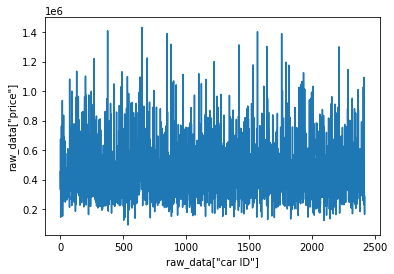

In [11]:
plt.plot(raw_data["car ID"],raw_data["price"])
plt.ylabel('raw_data["price"]')
plt.xlabel('raw_data["car ID"]')

<AxesSubplot:ylabel='Frequency'>

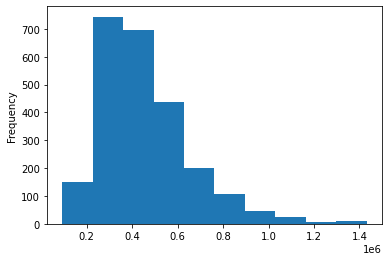

In [12]:
raw_data["price"].plot(kind = "hist")

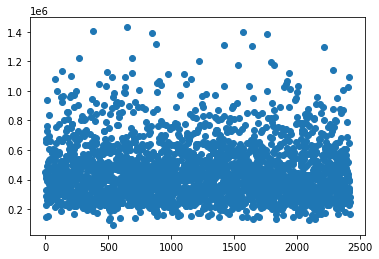

In [13]:
plt.scatter(raw_data["car ID"],raw_data["price"])

In [14]:
#4th owner cars in training data
raw_data[raw_data["pre_owner"]== "4th Owner"]

,car ID,model_year,maker,model_name,city,distance_covered (km),fuel_type,transmission_type,pre_owner,price
50,50,2013,Hyundai,i20,Mumbai,57539,Petrol,Manual,4th Owner,322599
542,542,2012,Honda,City,Noida,77333,Petrol,Automatic,4th Owner,366899
1054,1054,2011,Maruti,Alto K10,Bengaluru,67419,Petrol,Manual,4th Owner,231199
1529,1529,2014,Maruti,Celerio,Chennai,66622,Petrol,Automatic,4th Owner,360599


> **Normalization of train data and validation data**

In [15]:
normalization = make_column_transformer((MinMaxScaler(),['model_year','distance_covered (km)']))
normalization.fit(train_data)
train_data_normalized = normalization.transform(train_data)
validation_data_normalized = normalization.transform(validation_data)

In [16]:
train_data_normalized

array([[0.35714286, 0.16505257],
       [0.78571429, 0.12870758],
       [0.35714286, 0.21412941],
       ...,
       [0.78571429, 0.04499102],
       [0.57142857, 0.43518249],
       [0.78571429, 0.09761945]])

In [17]:
validation_data_normalized

array([[6.42857143e-01, 9.08624669e-02],
       [7.85714286e-01, 2.18326353e-01],
       [7.85714286e-01, 2.56261219e-02],
       [4.28571429e-01, 3.77391230e-01],
       [7.85714286e-01, 5.27780152e-02],
       [5.71428571e-01, 1.87178391e-01],
       [6.42857143e-01, 1.85285067e-01],
       [7.85714286e-01, 3.37635695e-04],
       [5.00000000e-01, 6.22873750e-02],
       [6.42857143e-01, 6.38281050e-01],
       [7.85714286e-01, 3.85588512e-02],
       [7.85714286e-01, 1.38798188e-01],
       [2.14285714e-01, 2.69108471e-01],
       [4.28571429e-01, 2.40824002e-01],
       [7.85714286e-01, 4.08197282e-02],
       [7.85714286e-01, 1.07795538e-01],
       [4.28571429e-01, 1.49816224e-01],
       [5.00000000e-01, 2.41589025e-01],
       [7.85714286e-01, 4.90640226e-02],
       [6.42857143e-01, 1.29267459e-01],
       [6.42857143e-01, 1.15676554e-01],
       [8.57142857e-01, 8.50670998e-02],
       [5.00000000e-01, 3.37661339e-01],
       [2.85714286e-01, 2.56316779e-01],
       [5.000000

> **Adding noramalized data to train_set and validation_set**

In [18]:
train_data = train_data.drop(columns = 'model_year')
train_data = train_data.drop(columns = 'distance_covered (km)')

validation_data = validation_data.drop(columns = 'model_year')
validation_data = validation_data.drop(columns = 'distance_covered (km)')


In [19]:
train_data.columns
validation_data.columns

Index(['maker_Ford', 'maker_Honda', 'maker_Hyundai', 'maker_Maruti',
       'maker_Renault', 'maker_Tata', 'maker_Volkswagen', 'model_name_Alto',
       'model_name_Alto 800', 'model_name_Alto K10', 'model_name_Amaze',
       'model_name_Baleno', 'model_name_Brio', 'model_name_Celerio',
       'model_name_Ciaz', 'model_name_City', 'model_name_Creta',
       'model_name_Dzire', 'model_name_Ecosport', 'model_name_Eeco',
       'model_name_Elite i20', 'model_name_Eon', 'model_name_Ertiga',
       'model_name_Grand i10', 'model_name_IGNIS', 'model_name_Jazz',
       'model_name_Kwid', 'model_name_NEW SANTRO', 'model_name_Polo',
       'model_name_Ritz', 'model_name_S Cross', 'model_name_Santro Xing',
       'model_name_Swift', 'model_name_Swift Dzire', 'model_name_Tiago',
       'model_name_VENUE', 'model_name_Vento', 'model_name_Verna',
       'model_name_Vitara Brezza', 'model_name_Wagon R 1.0', 'model_name_i10',
       'model_name_i20', 'city_Ahmedabad', 'city_Bengaluru', 'city_Chennai'

In [20]:
train_data[['model_year','distance_covered (km)']] = train_data_normalized
validation_data[['model_year','distance_covered (km)']] = validation_data_normalized

In [21]:
train_data

,maker_Ford,maker_Honda,maker_Hyundai,maker_Maruti,maker_Renault,maker_Tata,maker_Volkswagen,model_name_Alto,model_name_Alto 800,model_name_Alto K10,...,fuel_type_Petrol,fuel_type_Petrol + CNG,fuel_type_Petrol + LPG,transmission_type_Automatic,transmission_type_Manual,pre_owner_1st Owner,pre_owner_2nd Owner,pre_owner_3rd Owner,model_year,distance_covered (km)
1804,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,1,1,0,0,0.357143,0.165053
1763,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0.785714,0.128708
926,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0.357143,0.214129
1807,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0.642857,0.285272
1770,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,1,1,0,0,0.714286,0.048555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0.571429,0.264288
1095,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,1,1,0,0,0.500000,0.069361
1130,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0.785714,0.044991
1294,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0.571429,0.435182


> **MODEL PREPARATION**

In [22]:
#preparing model
tf.random.set_seed(42)
car_price_pridiction_model = tf.keras.Sequential([
                              tf.keras.layers.Dense(5000,activation = "relu"),
                              tf.keras.layers.Dense(5000,activation = "relu"),
                              tf.keras.layers.Dense(5000,activation = "relu"),
                              tf.keras.layers.Dropout(0.2),
                              
    
                              tf.keras.layers.Dense(4096,activation = "relu"),
                              tf.keras.layers.Dense(4096,activation = "relu"),
                              tf.keras.layers.Dense(4096,activation = "relu"), 
                              
                              
                              tf.keras.layers.Dense(2048,activation = "relu"),
                              tf.keras.layers.Dense(2048,activation = "relu"),
                              tf.keras.layers.Dense(2048,activation = "relu"),
                              
                              tf.keras.layers.Dense(1024,activation = "relu"),
                              tf.keras.layers.Dense(1024,activation = "relu"),
                              tf.keras.layers.Dense(1024,activation = "relu"),
                              
                              
                              tf.keras.layers.Dense(512,activation = "relu"),
                              tf.keras.layers.Dense(512,activation = "relu"),
                              tf.keras.layers.Dense(512,activation = "relu"),
                              
                              tf.keras.layers.Dense(256,activation = "relu"),
                              tf.keras.layers.Dense(256,activation = "relu"),
                              tf.keras.layers.Dense(256,activation = "relu"),
                              tf.keras.layers.Dense(128,activation = "relu"),
                              tf.keras.layers.Dense(128,activation = "relu"),
                              tf.keras.layers.Dense(1)
                                            ])
car_price_pridiction_model.compile(loss=tf.keras.losses.MeanSquaredLogarithmicError(),optimizer= tf.keras.optimizers.Adam(learning_rate = 0.0001))

car_price_pridiction = car_price_pridiction_model.fit(train_data,train_labels,batch_size = 32,steps_per_epoch= 50,epochs = 32,validation_data = (validation_data,validation_labels))


Epoch 1/32
50/50 [==============================] - 3s 20ms/step - loss: 39.3860 - val_loss: 0.7511
Epoch 2/32
50/50 [==============================] - 1s 16ms/step - loss: 0.2381 - val_loss: 0.1456
Epoch 3/32
50/50 [==============================] - 1s 16ms/step - loss: 0.1442 - val_loss: 0.1333
Epoch 4/32
50/50 [==============================] - 1s 16ms/step - loss: 0.1277 - val_loss: 0.1174
Epoch 5/32
50/50 [==============================] - 1s 16ms/step - loss: 0.1092 - val_loss: 0.1009
Epoch 6/32
50/50 [==============================] - 1s 16ms/step - loss: 0.0897 - val_loss: 0.0743
Epoch 7/32
50/50 [==============================] - 1s 16ms/step - loss: 0.0566 - val_loss: 0.0540
Epoch 8/32
50/50 [==============================] - 1s 16ms/step - loss: 0.0438 - val_loss: 0.0381
Epoch 9/32
50/50 [==============================] - 1s 16ms/step - loss: 0.0317 - val_loss: 0.0272
Epoch 10/32
50/50 [==============================] - 1s 16ms/step - loss: 0.0210 - val_loss: 0.0217
Epoch 11

Text(0.5, 0, 'epochs')

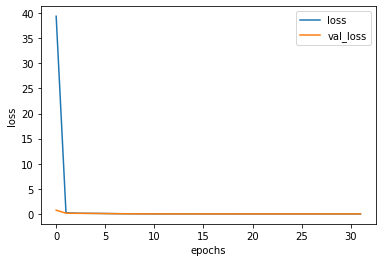

In [23]:
pd.DataFrame(car_price_pridiction.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [24]:
car_price_pridiction_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5000)              320000    
_________________________________________________________________
dense_1 (Dense)              (None, 5000)              25005000  
_________________________________________________________________
dense_2 (Dense)              (None, 5000)              25005000  
_________________________________________________________________
dropout (Dropout)            (None, 5000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 4096)              20484096  
_________________________________________________________________
dense_4 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_5 (Dense)              (None, 4096)              1

In [25]:
# validation_labels.head(10)  # just for fun

In [26]:
#car_price_pridiction_model.predict(validation_data)

In [27]:
car_price_pridiction_model.evaluate(validation_data,validation_labels)

8/8 [==============================] - 0s 3ms/step - loss: 0.0102


0.010228995233774185

> **Importing testdata**

In [28]:
raw_test_data = pd.read_csv("../input/logical-rhythm-2k21-cars24/test.csv")
raw_test_data

,car ID,model_year,maker,model_name,city,distance_covered (km),fuel_type,transmission_type,pre_owner
0,0,2008,Hyundai,i10,Mumbai,64719,Petrol,Manual,2nd Owner
1,1,2017,Maruti,Baleno,Ahmedabad,73016,Diesel,Manual,2nd Owner
2,2,2015,Maruti,Alto K10,Noida,60016,Petrol,Manual,1st Owner
3,3,2011,Maruti,Swift Dzire,Hyderabad,108096,Petrol,Manual,1st Owner
4,4,2011,Hyundai,i10,Hyderabad,73802,Petrol,Automatic,2nd Owner
...,...,...,...,...,...,...,...,...,...
600,600,2016,Renault,Kwid,Noida,37413,Petrol,Manual,1st Owner
601,601,2015,Maruti,Swift,Ahmedabad,62428,Petrol,Manual,1st Owner
602,602,2015,Maruti,Ciaz,Noida,61211,Diesel,Manual,2nd Owner
603,603,2011,Maruti,Alto K10,Bengaluru,64152,Petrol,Manual,1st Owner


> **Preparing test dataset**

In [29]:
test_data = pd.get_dummies(raw_test_data) 
test_data = test_data.drop(columns = 'car ID')
test_data

,model_year,distance_covered (km),maker_Ford,maker_Honda,maker_Hyundai,maker_Maruti,maker_Renault,maker_Tata,maker_Volkswagen,model_name_Alto,...,city_Pune,fuel_type_Diesel,fuel_type_Petrol,fuel_type_Petrol + CNG,fuel_type_Petrol + LPG,transmission_type_Automatic,transmission_type_Manual,pre_owner_1st Owner,pre_owner_2nd Owner,pre_owner_3rd Owner
0,2008,64719,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,2017,73016,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,2015,60016,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
3,2011,108096,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,2011,73802,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,2016,37413,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
601,2015,62428,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
602,2015,61211,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
603,2011,64152,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0


> **Normalization**

In [30]:
normalization = make_column_transformer((MinMaxScaler(),['model_year','distance_covered (km)']))
normalization.fit(test_data)
test_data_normalized = normalization.transform(test_data)

> **Adding normalize data**

In [31]:
test_data = test_data.drop(columns = 'model_year')
test_data = test_data.drop(columns = 'distance_covered (km)')
test_data[['model_year','distance_covered (km)']] = test_data_normalized


In [32]:
test_data

,maker_Ford,maker_Honda,maker_Hyundai,maker_Maruti,maker_Renault,maker_Tata,maker_Volkswagen,model_name_Alto,model_name_Alto 800,model_name_Alto K10,...,fuel_type_Petrol,fuel_type_Petrol + CNG,fuel_type_Petrol + LPG,transmission_type_Automatic,transmission_type_Manual,pre_owner_1st Owner,pre_owner_2nd Owner,pre_owner_3rd Owner,model_year,distance_covered (km)
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0.071429,0.070154
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0.714286,0.079255
2,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,1,1,0,0,0.571429,0.064995
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0.285714,0.117736
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0.285714,0.080117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0.642857,0.040200
601,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0.571429,0.067640
602,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0.571429,0.066305
603,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,1,1,0,0,0.285714,0.069532


In [33]:
#cause of removing 4th owner data
raw_test_data[raw_test_data["pre_owner"] == "4th Owner"]

,car ID,model_year,maker,model_name,city,distance_covered (km),fuel_type,transmission_type,pre_owner


In [34]:
test_data.shape,train_data.shape



((605, 63), (2178, 63))

> **predicting over testdata set**

In [35]:
price_pridiction = car_price_pridiction_model.predict(test_data)

In [36]:
raw_test_data["price"] = price_pridiction

> **Complete dataframe of testset with pridicted price**

In [37]:
raw_test_data

,car ID,model_year,maker,model_name,city,distance_covered (km),fuel_type,transmission_type,pre_owner,price
0,0,2008,Hyundai,i10,Mumbai,64719,Petrol,Manual,2nd Owner,188453.640625
1,1,2017,Maruti,Baleno,Ahmedabad,73016,Diesel,Manual,2nd Owner,567778.500000
2,2,2015,Maruti,Alto K10,Noida,60016,Petrol,Manual,1st Owner,269970.531250
3,3,2011,Maruti,Swift Dzire,Hyderabad,108096,Petrol,Manual,1st Owner,418521.031250
4,4,2011,Hyundai,i10,Hyderabad,73802,Petrol,Automatic,2nd Owner,348935.062500
...,...,...,...,...,...,...,...,...,...,...
600,600,2016,Renault,Kwid,Noida,37413,Petrol,Manual,1st Owner,277292.187500
601,601,2015,Maruti,Swift,Ahmedabad,62428,Petrol,Manual,1st Owner,472338.281250
602,602,2015,Maruti,Ciaz,Noida,61211,Diesel,Manual,2nd Owner,583522.687500
603,603,2011,Maruti,Alto K10,Bengaluru,64152,Petrol,Manual,1st Owner,274235.843750


Text(0.5, 0, 'raw_test_data["car ID"]')

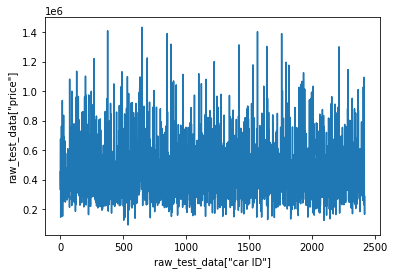

In [38]:
plt.plot(raw_data["car ID"],raw_data["price"])
plt.ylabel('raw_test_data["price"]')
plt.xlabel('raw_test_data["car ID"]')

> **CSV file of car id and price**

In [39]:
car_id = raw_test_data["car ID"]
predicted_price = raw_test_data["price"]
dict = { "car id": car_id,
          "price":predicted_price}
predicted_submit_file = pd.DataFrame(dict)


In [40]:
predicted_submit_file
predicted_submit_file.to_csv("submission_q2",index = False)